# Tests

## 1. Tests for iterations number

Below tests for sinuses functions (see [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.1). We generate this functions for constant array of lists of parameters. A square in task is square with vertices $(0, 0), (0, 1), (1, 0), (1, 1)$.

This functions met conditions of lemma 2(see [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

Each point on graphick is parameter of task - upper bound for iterations number - and iterations number.

<IPython.core.display.Javascript object>


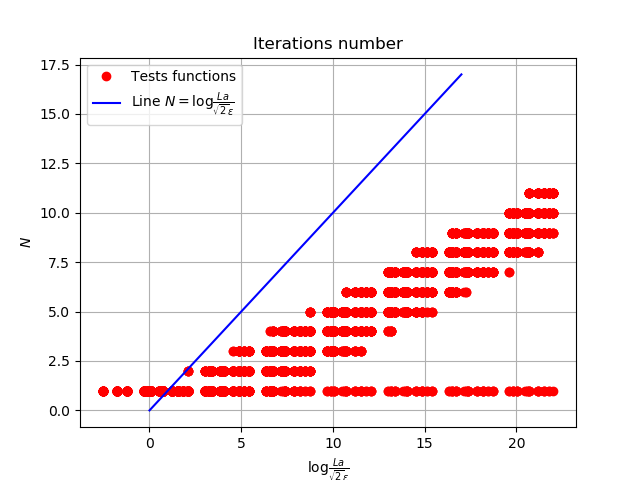

In [4]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
%matplotlib notebook

eps = [0.1**i for i in range(7)]
comparison.num_iter_tests(eps)

Results of this experiment met theoretical results for number of iterations (see Theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

## 2. Comparison of gradient descent and our method

In following tests on graphic there are following names of type for tasks' results:

* Type 1 (T1) - tasks which gradient descent completed but halving square was not complete,

* Type 2 (T2) - gradient descent is faster than halving square,

* Type 3 (T3) - work's times are approximately equal or time is too short to measure,

* Type 4 (T4) - gradient descent is slower than halving square,

* Type 5 (T5) - gradient descent was not complete but halving square completed,

* Type 6 (T6) - both methods were not completed successfully

### 2.1. Sinuses

Generation of functions and square is same as before for sinuses.

In this part we use that choice of rectangle does not depend on found point on separating segment.

<IPython.core.display.Javascript object>


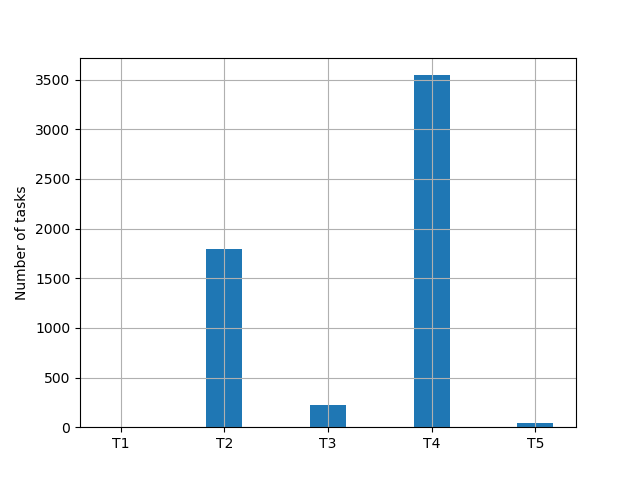

In [5]:
%matplotlib notebook

epsilon = [0.1**(3 + i) for i in range(7)]
comparison.comparison_GD_HS_sinuses(epsilon)

### 2.2 Quadratic functions
See [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.2. In this tests we use the constant estimate for accuracy on separating segment from work of Stonakin and Pasechnuk.

<IPython.core.display.Javascript object>


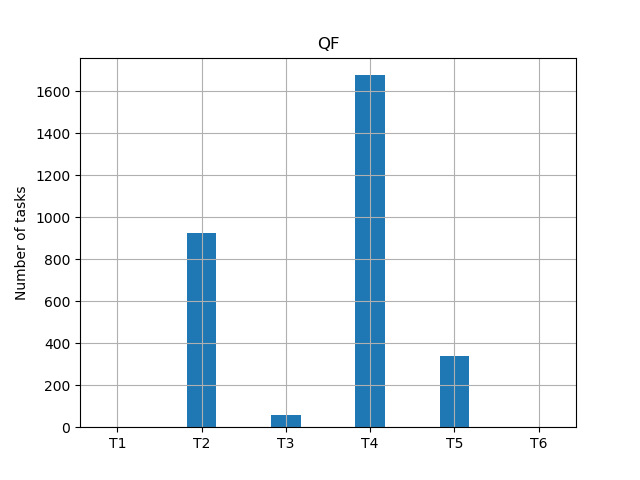

In [3]:
%matplotlib notebook

epsilon = [0.1**(i) for i in range(3)]
comparison.comparison_GD_HS_QFunc(epsilon)